In [82]:
def filter_short_ground_truths(df):
    """篩選 ground_truths_ans 長度小於2的資料列"""
    mask = df['ground_truths_ans'].apply(
        lambda x: len(x.split()) if isinstance(x, str) else (len(x) if isinstance(x, list) else 0)
    ) > 2
    return df[mask]


### 從單個 CSV 檔案讀取指定列並繪製折線圖

F1 Score - 平均: 0.1069, 最大: 1.0000, 最小: 0.0000


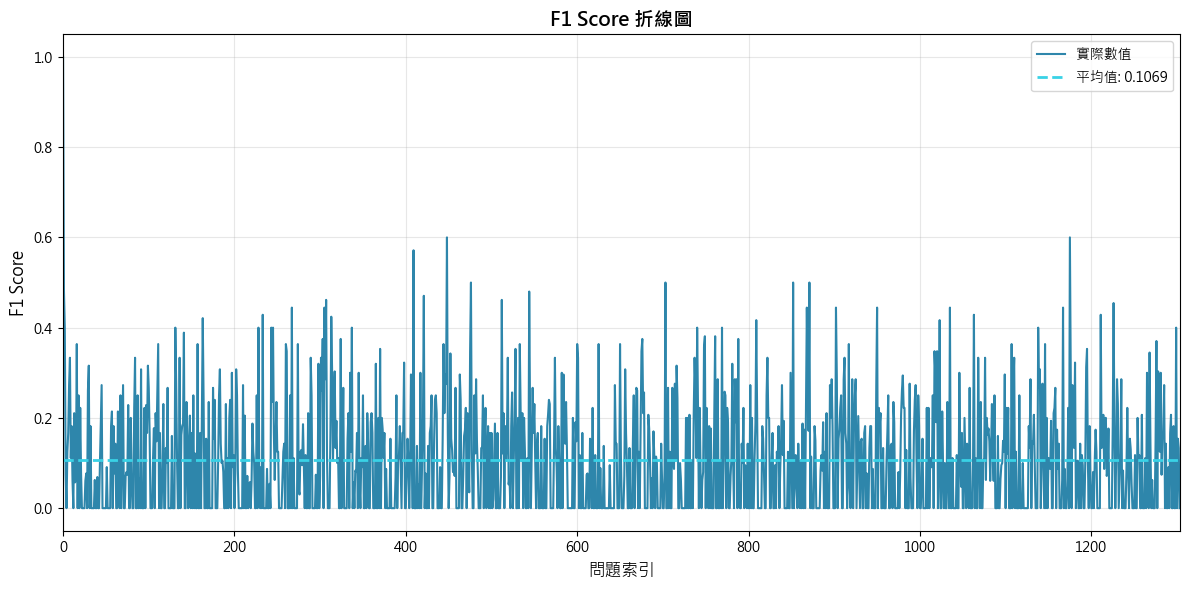

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

def plot_line_from_csv(csv_file, col_index=0, xlabel='索引', ylabel='數值', title='折線圖', header=None, adjustment=1, filter = True):
    """
    從 CSV 檔案讀取指定列並繪製折線圖
    
    參數:
        csv_file: CSV 檔案路徑
        col_index: 要繪製的列索引，預設為 0（第一列）
        xlabel: X 軸標籤，預設為 '索引'
        ylabel: Y 軸標籤，預設為 '數值'
        title: 圖表標題，預設為 '折線圖'
        header: CSV 檔案的標頭列索引，None 表示無標頭，0 表示第一列是標頭
        adjustment: 數據調整係數，預設為 1
    
    回傳:
        fig: matplotlib 圖表物件
    """
    # 讀取 CSV 檔案
    csv_file = f'results/{csv_file}'
    df = pd.read_csv(csv_file, header=header)
    if filter:
        df = filter_short_ground_truths(df)
    # 取得指定列的數據並轉換為數值類型
    data = pd.to_numeric(df.iloc[:, col_index], errors='coerce').values * adjustment
    
    # 建立 x 軸索引
    x = range(len(data))
    
    # 建立圖表
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 繪製折線圖（不使用 marker，只有線）
    ax.plot(x, data, linewidth=1.5, color='#2E86AB', label='實際數值')
    
    # 過濾掉 NaN 值後計算平均值
    data_clean = data[~np.isnan(data)]
    
    if len(data_clean) > 0:
        mean_value = data_clean.mean()
        # 繪製平均值水平線
        ax.axhline(y=mean_value, color="#39D2E6", linestyle='--', linewidth=2, 
                   label=f'平均值: {mean_value:.4f}')
        print(f"{ylabel} - 平均: {mean_value:.4f}, 最大: {data_clean.max():.4f}, 最小: {data_clean.min():.4f}")
    else:
        print(f"警告: 沒有有效的數值數據")
    
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, len(data)-0.5)
    ax.legend(loc='best', fontsize=10)
    
    # 調整布局
    plt.tight_layout()
    
    # 顯示圖表
    plt.show()
    
    return fig

# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='med_baseline.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 折線圖',
        header=0,
        filter=True
    )

F1 Score - 平均: 0.0356, 最大: 1.0000, 最小: 0.0000


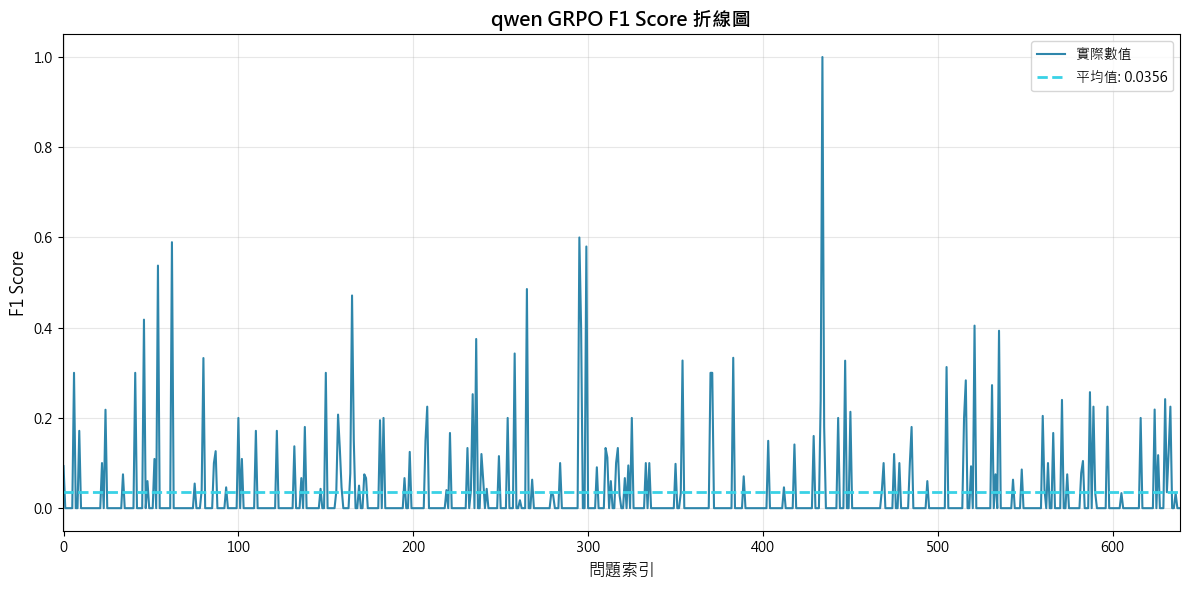

In [84]:

# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='qwen3_GRPO_F1.csv',
        col_index=2,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='qwen GRPO F1 Score 折線圖',
        header=0,
        adjustment=0.2,
        filter=False
    )

F1 Score - 平均: 0.2393, 最大: 0.8889, 最小: 0.0000


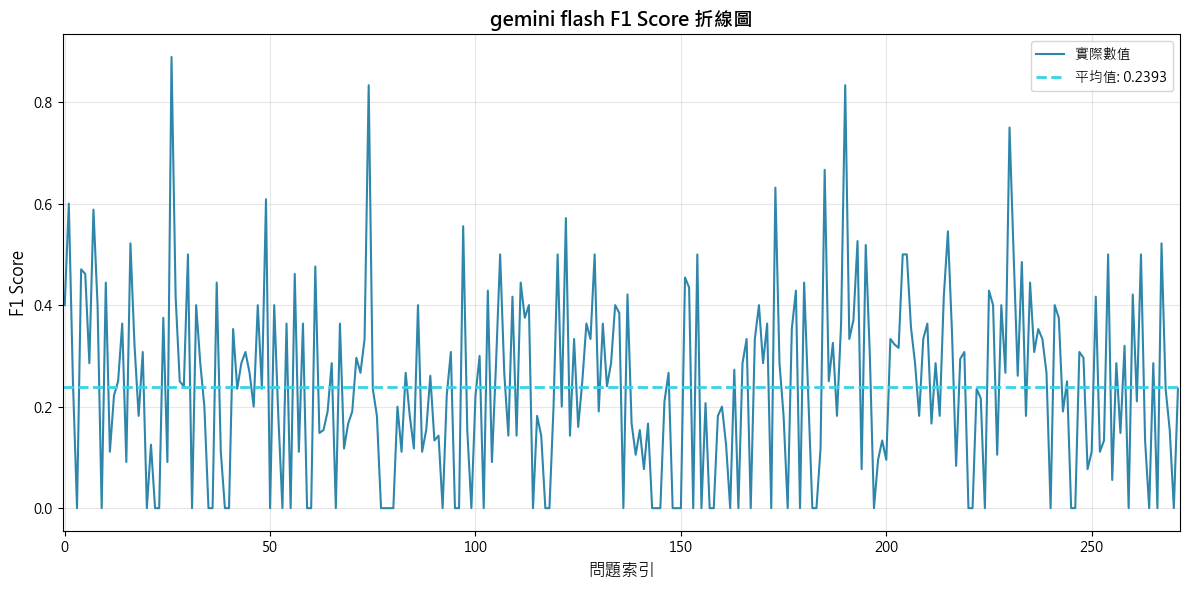

In [85]:
# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='gemini_flash_results.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='gemini flash F1 Score 折線圖',
        header=0,
        adjustment=1
    )

F1 Score - 平均: 0.2618, 最大: 0.8000, 最小: 0.0000


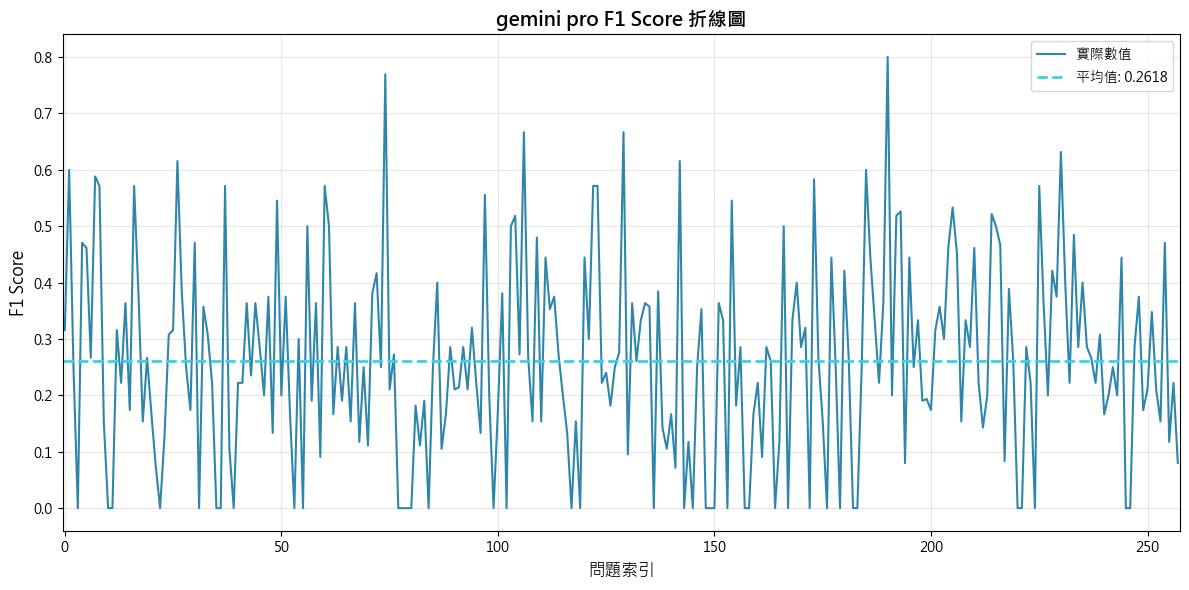

In [86]:
# 使用範例
if __name__ == "__main__":
    # 繪製 F1 Score 折線圖（第一列，無標頭）
    plot_line_from_csv(
        csv_file='gemini_pro_results.csv',
        col_index=0,
        xlabel='問題索引',
        ylabel='F1 Score',
        title='gemini pro F1 Score 折線圖',
        header=0,
        adjustment=1
    )

### 從多個 CSV 檔案讀取指定列並繪製在同一張折線圖上

medgemma 4B - 平均: 0.1074 (樣本數: 640), 最大: 1.0000, 最小: 0.0000
  有效數據點: 639/640
Qwen3 4B GRPO  - 平均: 0.0356 (樣本數: 640), 最大: 1.0000, 最小: 0.0000
  有效數據點: 639/640


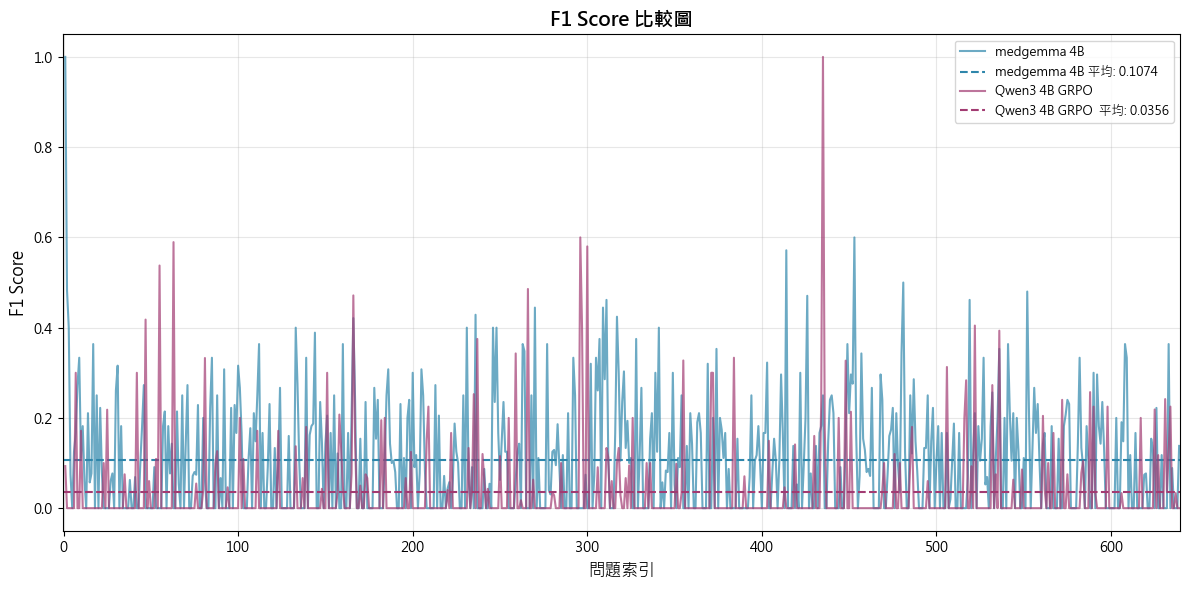

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_lines_from_csv(csv_configs, xlabel='索引', ylabel='數值', title='折線圖比較', filter=True):
    """
    從多個 CSV 檔案讀取指定列並繪製在同一張折線圖上，
    統計資訊（平均值）僅計算至所有數據的最短共同長度。
    """
    # 建立圖表
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 準備儲存讀取後的數據與配置
    all_processed_data = []
    min_length = float('inf')
    
    # 第一步：先讀取所有數據並確定最短長度 (min_length)
    for config in csv_configs:
        csv_file = config['csv_file']
        # 這裡假設檔案都在 results/ 目錄下，若路徑不同請自行調整
        path = f'results/{csv_file}'
        col_index = config['col_index']
        header = config.get('header', None)
        adjustment = config.get('adjustment', 1)
        
        # 讀取 CSV
        df = pd.read_csv(path, header=header)
        
        # 若有過濾函式則執行 (假設 filter_short_ground_truths 已定義)
        if filter and 'filter_short_ground_truths' in globals():
            df = filter_short_ground_truths(df)
            
        # 取得數據並轉換
        data = pd.to_numeric(df.iloc[:, col_index], errors='coerce').values * adjustment
        
        # 更新最短長度
        min_length = min(min_length, len(data))
        
        # 暫存數據以供後續處理
        all_processed_data.append({
            'data': data,
            'config': config
        })

    # 第二步：根據 min_length 截斷數據、繪圖與計算統計資訊
    for item in all_processed_data:
        full_data = item['data']
        config = item['config']
        label = config['label']
        color = config.get('color', None)
        
        # 【關鍵修改】只取到 min_length 的數據
        data = full_data[:min_length]
        
        # 建立 x 軸索引
        x = range(len(data))
        
        # 繪製折線圖
        if color:
            line_plot = ax.plot(x, data, linewidth=1.5, label=label, color=color, alpha=0.7)
            current_color = color
        else:
            line_plot = ax.plot(x, data, linewidth=1.5, label=label, alpha=0.7)
            current_color = line_plot[0].get_color()
        
        # 計算統計資訊（此時 data 已經是截斷至 min_length 的長度）
        data_clean = data[~np.isnan(data)]
        if len(data_clean) > 0:
            mean_value = data_clean.mean()
            
            # 繪製平均值水平線
            ax.axhline(y=mean_value, color=current_color, linestyle='--', linewidth=1.5, 
                      alpha=1, label=f'{label} 平均: {mean_value:.4f}')
            
            print(f"{label} - 平均: {mean_value:.4f} (樣本數: {min_length}), 最大: {data_clean.max():.4f}, 最小: {data_clean.min():.4f}")
            print(f"  有效數據點: {len(data_clean)}/{len(data)}")

    # 設定圖表屬性
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # 確保 X 軸範圍剛好落在 min_length
    ax.set_xlim(-0.5, min_length - 0.5)
    ax.legend(fontsize=9, loc='best')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# 使用範例
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 0,
                'label': 'medgemma 4B',
                'header': None,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen3_GRPO_F1.csv',
                'col_index': 2,
                'label': 'Qwen3 4B GRPO ',
                'header': None,
                'adjustment': 0.2,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=False
    )

medgemma 4B - 平均: 0.1069 (樣本數: 1304), 最大: 1.0000, 最小: 0.0000
  有效數據點: 1304/1304
Qwen3 4B - 平均: 0.1818 (樣本數: 1304), 最大: 1.0000, 最小: 0.0000
  有效數據點: 1304/1304


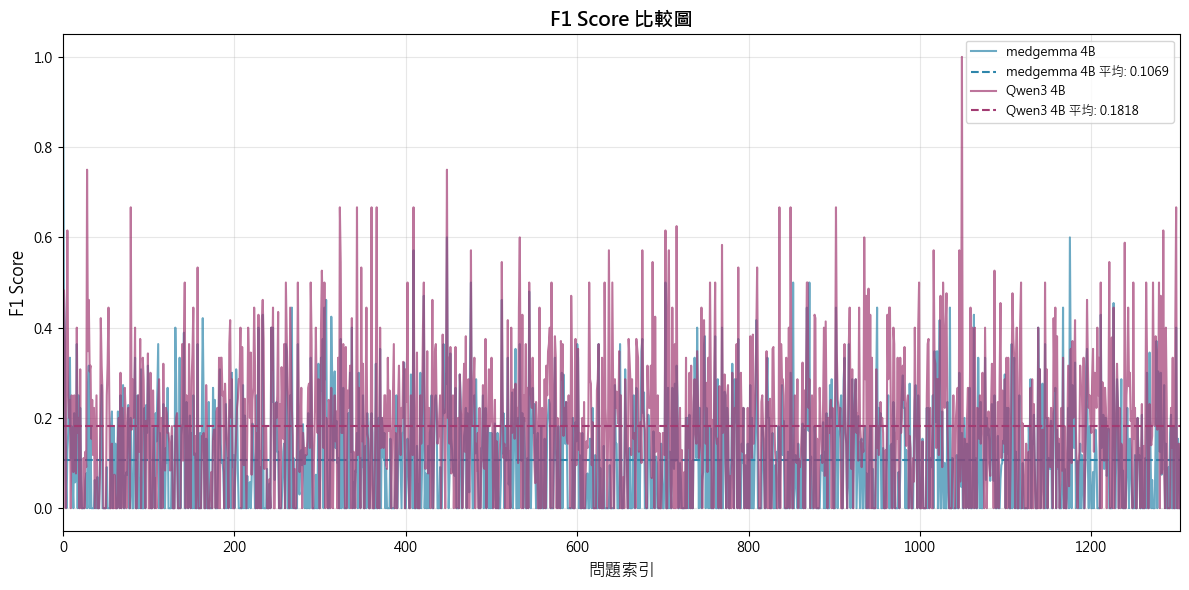

In [88]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 0,
                'label': 'medgemma 4B',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline.csv',
                'col_index': 0,
                'label': 'Qwen3 4B',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

medgemma 4B - 平均: 1449.5905 (樣本數: 1304), 最大: 2000.0000, 最小: 50.0000
  有效數據點: 1304/1304
Qwen3 4B - 平均: 483.0782 (樣本數: 1304), 最大: 2000.0000, 最小: 126.0000
  有效數據點: 1304/1304


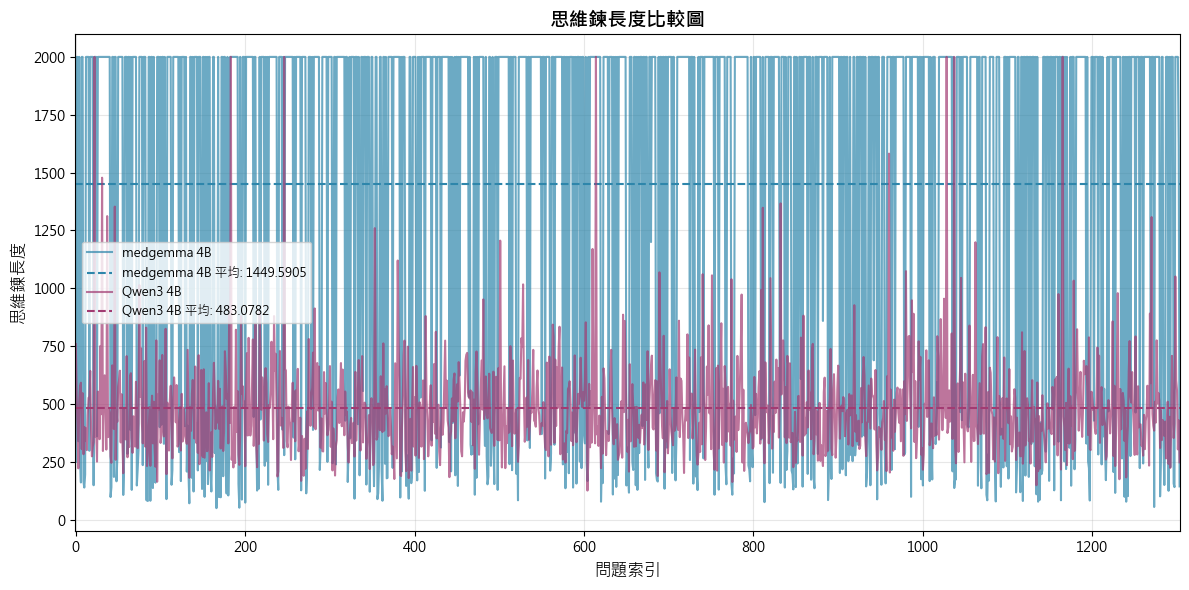

In [89]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'med_baseline.csv',
                'col_index': 1,
                'label': 'medgemma 4B',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline.csv',
                'col_index': 1,
                'label': 'Qwen3 4B',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='思維鍊長度',
        title='思維鍊長度比較圖',
        filter=True
    )

gemini_flash - 平均: 0.2393 (樣本數: 272), 最大: 0.8889, 最小: 0.0000
  有效數據點: 272/272
Qwen3 14B - 平均: 0.2538 (樣本數: 272), 最大: 0.9091, 最小: 0.0000
  有效數據點: 272/272


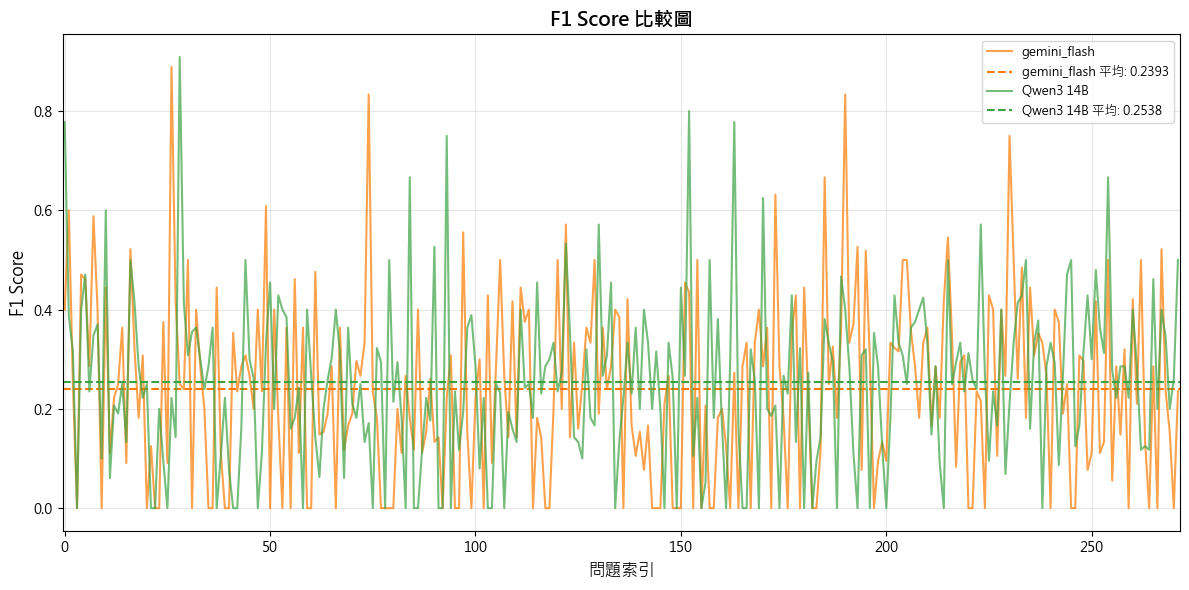

In [90]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'gemini_flash_results.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color': "#FC7A00"
            },
            {
                'csv_file': 'qwen_baseline_14B.csv',
                'col_index': 0,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': "#3BA242"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

gemini_flash_v0 - 平均: 0.3255 (樣本數: 333), 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333
gemini_pro_v0 - 平均: 0.3469 (樣本數: 333), 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333


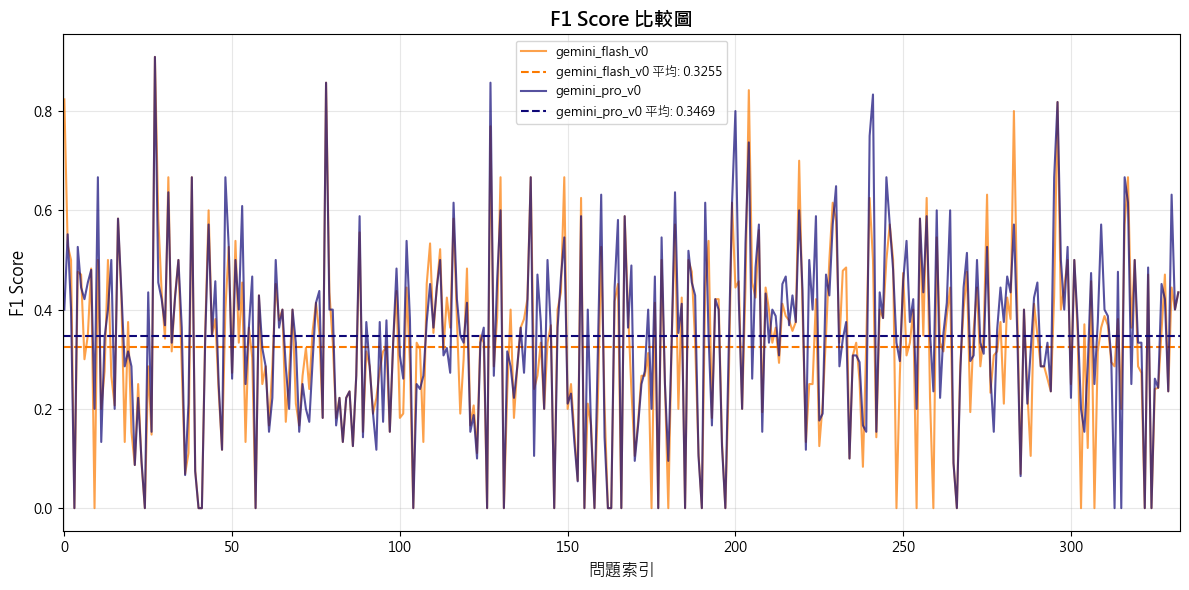

In [91]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash_v0',
                'header': 0,
                'color':  "#FC7A00"
            },
            {
                'csv_file': 'gemini_pro_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_pro_v0',
                'header': 0,
                'color': "#0E0777"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v2 - 平均: 0.2514 (樣本數: 366), 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366
gemini_flash - 平均: 0.3255 (樣本數: 366), 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366


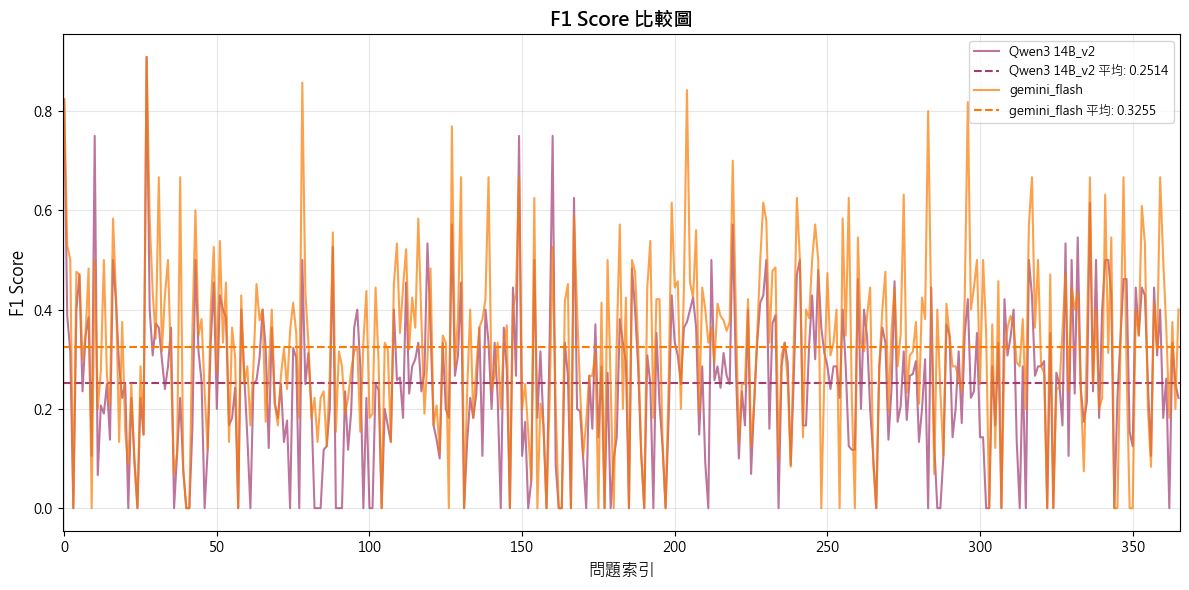

In [92]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B_v2',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color':  "#FC7A00"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v2 - 平均: 0.2457 (樣本數: 333), 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333
gemini_pro - 平均: 0.3469 (樣本數: 333), 最大: 0.9091, 最小: 0.0000
  有效數據點: 333/333


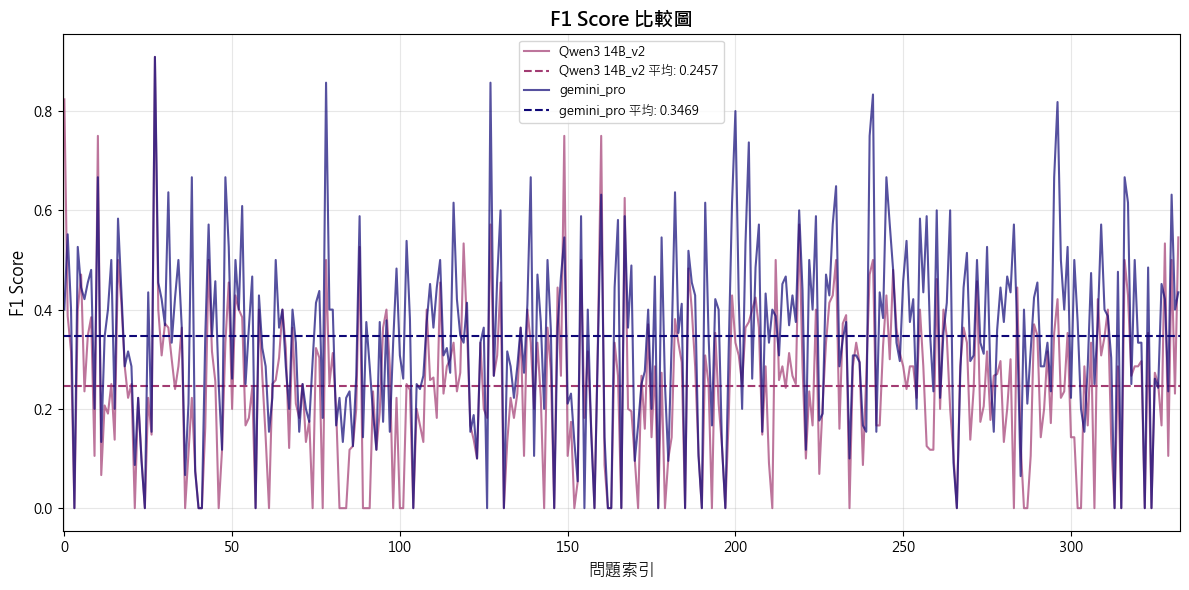

In [93]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B_v2',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'gemini_pro_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_pro',
                'header': 0,
                'color':  "#0E0777"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

Qwen3 14B_v1 - 平均: 1494.8035 (樣本數: 570), 最大: 2000.0000, 最小: 386.0000
  有效數據點: 570/570
Qwen3 14B - 平均: 1491.4895 (樣本數: 570), 最大: 2000.0000, 最小: 386.0000
  有效數據點: 570/570


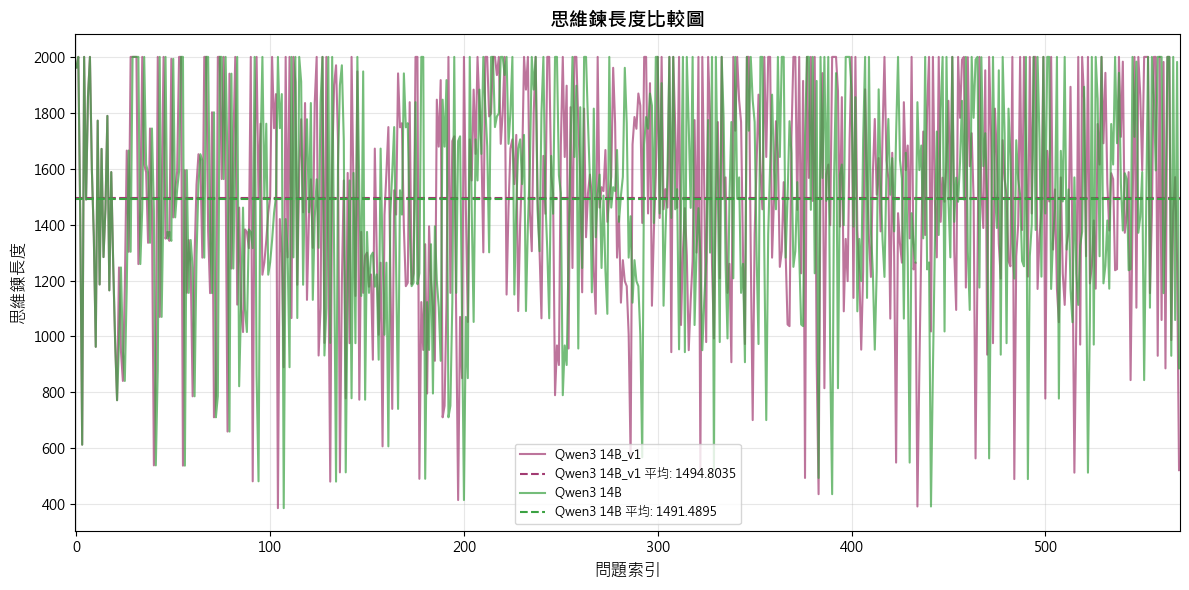

In [94]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 1,
                'label': 'Qwen3 14B_v1',
                'header': 0,
                'color': '#A23B72'
            },
            {
                'csv_file': 'qwen_baseline_14B.csv',
                'col_index': 1,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': "#3BA242"
            }
        ],
        xlabel='問題索引',
        ylabel='思維鍊長度',
        title='思維鍊長度比較圖',
        filter=True
    )

qwen_14B_sft_gemini_with_ans - 平均: 0.2664 (樣本數: 108), 最大: 0.8235, 最小: 0.0000
  有效數據點: 108/108
Qwen3 14B - 平均: 0.2312 (樣本數: 108), 最大: 0.9091, 最小: 0.0000
  有效數據點: 108/108


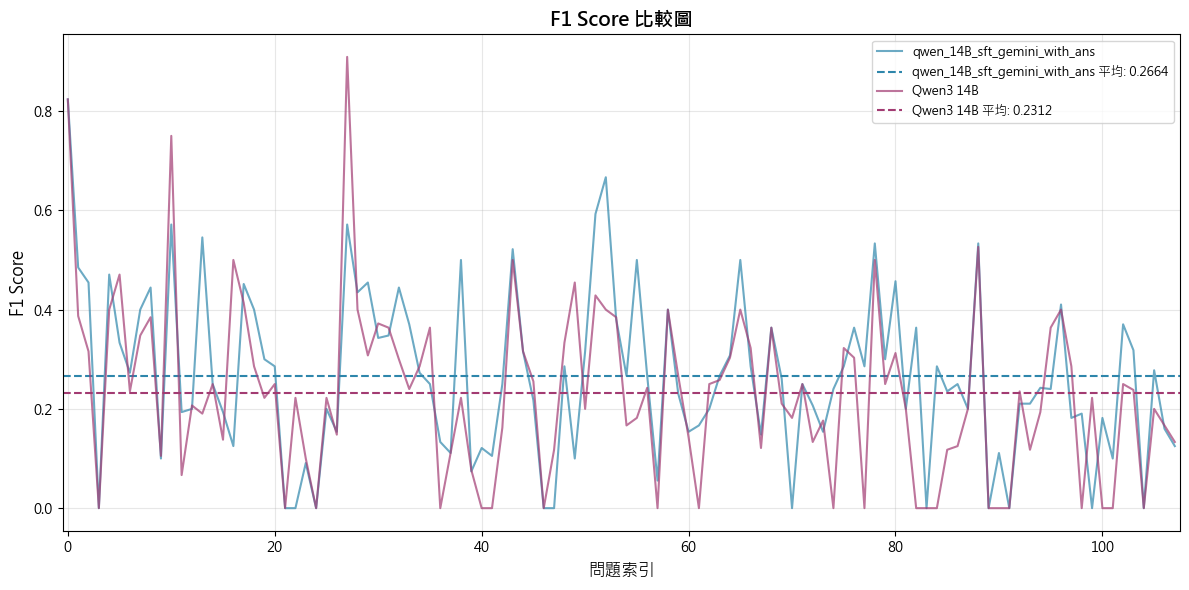

In [95]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'test_Qwen3-14B-sft_v1.csv',
                'col_index': 0,
                'label': 'qwen_14B_sft_gemini_with_ans',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

qwen_14B_sft - 平均: 0.2775 (樣本數: 366), 最大: 0.8571, 最小: 0.0000
  有效數據點: 366/366
Qwen3 14B - 平均: 0.2514 (樣本數: 366), 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366
gemini_flash - 平均: 0.3255 (樣本數: 366), 最大: 0.9091, 最小: 0.0000
  有效數據點: 366/366


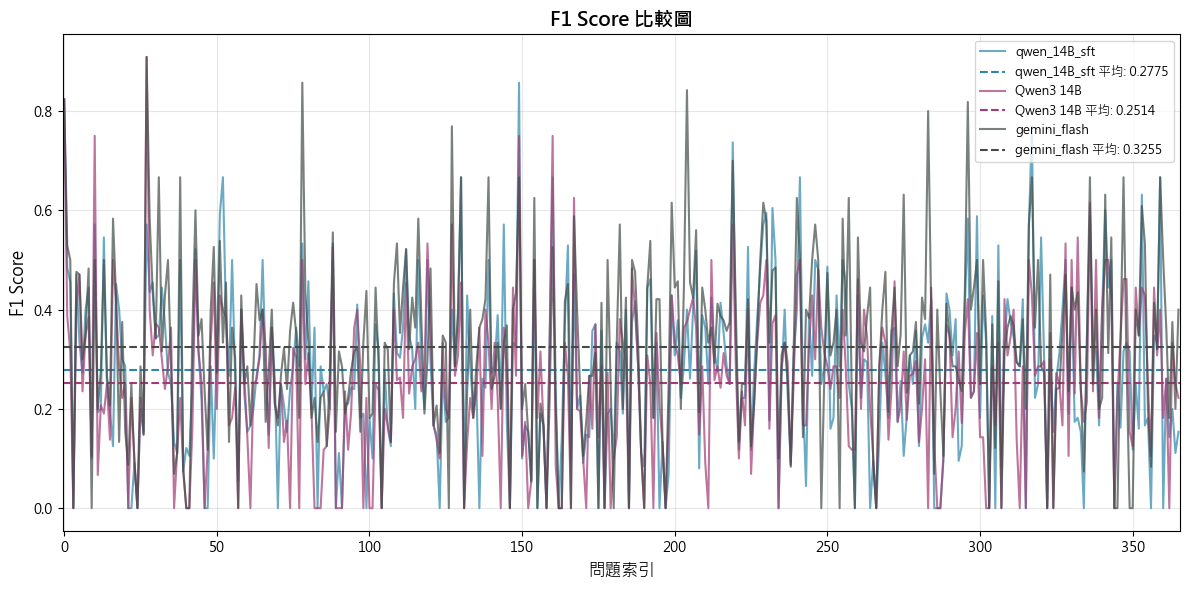

In [96]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'test_Qwen3-14B-sft_v1_1.csv',
                'col_index': 2,
                'label': 'qwen_14B_sft',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': '#A23B72'
            },
                        {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color':  "#424B45"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

qwen_14B_sft_gemini_without_ans_0.2 - 平均: 0.2664 (樣本數: 108), 最大: 0.8235, 最小: 0.0000
  有效數據點: 108/108
qwen_14B_sft_gemini_with_ans - 平均: 0.2664 (樣本數: 108), 最大: 0.8235, 最小: 0.0000
  有效數據點: 108/108


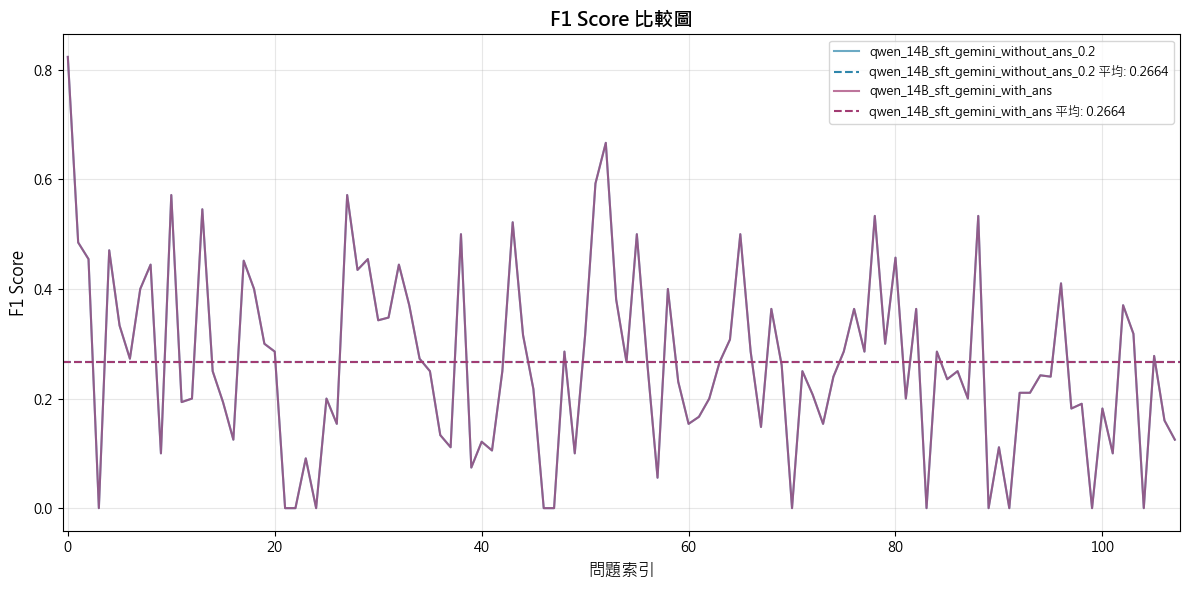

In [97]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'test_Qwen3-14B-sft_v1_1.csv',
                'col_index': 2,
                'label': 'qwen_14B_sft_gemini_without_ans_0.2',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'test_Qwen3-14B-sft_v1.csv',
                'col_index': 0,
                'label': 'qwen_14B_sft_gemini_with_ans',
                'header': 0,
                'color': '#A23B72'
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

qwen_14B_sft_gemini_without_ans - 平均: 0.2672 (樣本數: 439), 最大: 0.9474, 最小: 0.0000
  有效數據點: 439/439
Qwen3 14B - 平均: 0.2491 (樣本數: 439), 最大: 0.9091, 最小: 0.0000
  有效數據點: 439/439


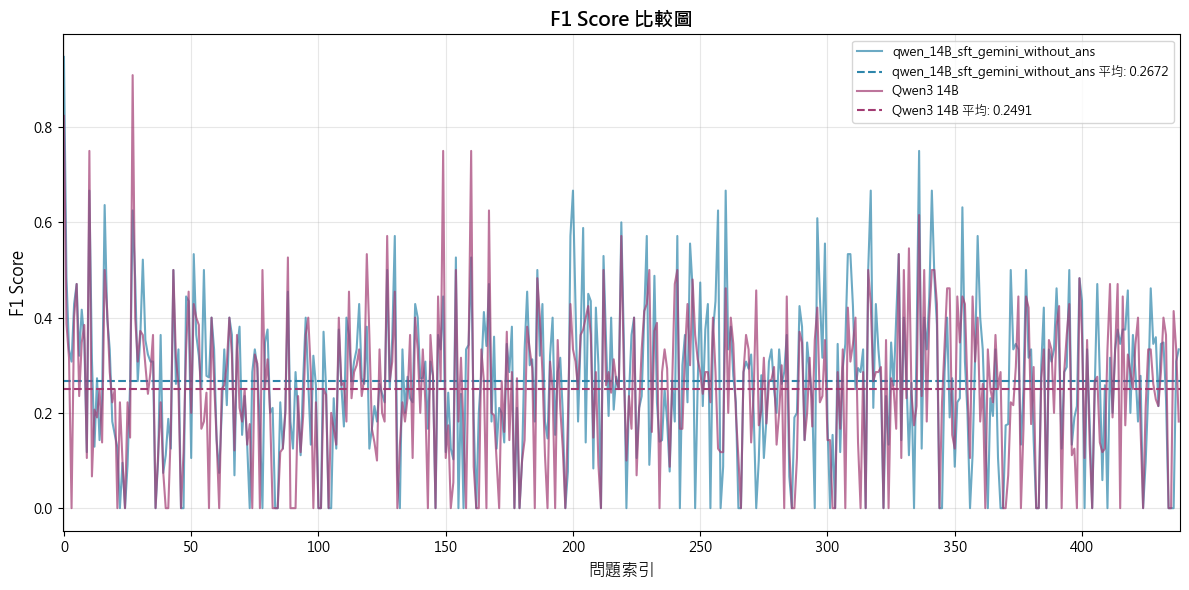

In [98]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'test_Qwen3-14B-sft_v2.csv',
                'col_index': 2,
                'label': 'qwen_14B_sft_gemini_without_ans',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'qwen_baseline_14B_v2.csv',
                'col_index': 0,
                'label': 'Qwen3 14B',
                'header': 0,
                'color': '#A23B72'
            },
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

qwen_32B_sft - 平均: 0.3953 (樣本數: 5), 最大: 0.6250, 最小: 0.0000
  有效數據點: 5/5
gemini_flash - 平均: 0.4658 (樣本數: 5), 最大: 0.8235, 最小: 0.0000
  有效數據點: 5/5


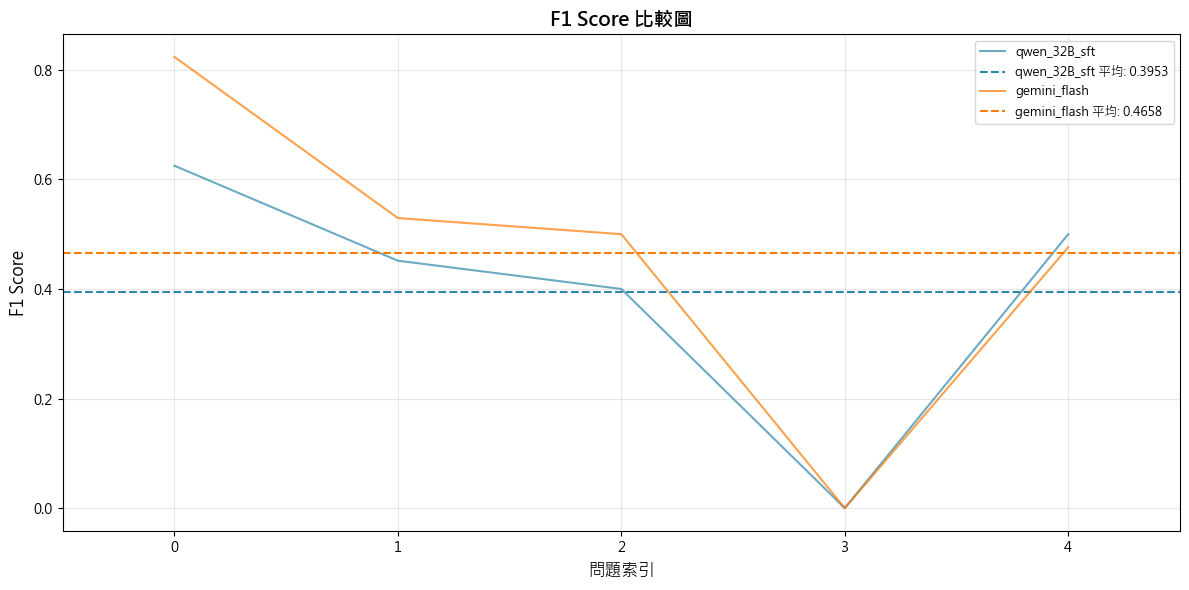

In [99]:
if __name__ == "__main__":
    # 比較兩個模型的 F1 Score
    plot_multiple_lines_from_csv(
        csv_configs=[
            {
                'csv_file': 'test_Qwen3-32B-sft.csv',
                'col_index': 2,
                'label': 'qwen_32B_sft',
                'header': 0,
                'color': '#2E86AB'
            },
            {
                'csv_file': 'gemini_flash_results_v0.csv',
                'col_index': 0,
                'label': 'gemini_flash',
                'header': 0,
                'color':  "#FC7A00"
            }
        ],
        xlabel='問題索引',
        ylabel='F1 Score',
        title='F1 Score 比較圖',
        filter=True
    )

In [100]:
import pandas as pd

# 設定檔案路徑
file_path = 'results/test_Qwen3-32B-sft.csv'

try:
    # 讀取 CSV 檔案
    df = pd.read_csv(file_path)

    # 檢查 "accuracy reward" 欄位是否存在
    if 'accuracy_reward' in df.columns:
        # 印出該欄位的數值
        print("--- Accuracy Reward 數值如下 ---")
        print(df['accuracy_reward'])
    else:
        print(f"錯誤：檔案中找不到 'accuracy reward' 欄位。")
        print(f"現有的欄位有：{df.columns.tolist()}")

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'，請確認檔案路徑是否正確。")
except Exception as e:
    print(f"發生未預期的錯誤：{e}")

--- Accuracy Reward 數值如下 ---
0    0.625000
1    0.451613
2    0.400000
3    0.000000
4    0.500000
Name: accuracy_reward, dtype: float64


In [101]:
import pandas as pd

# 設定檔案路徑
file_path = 'results/gemini_flash_results_v0.csv'

try:
    # 讀取 CSV 檔案
    df = pd.read_csv(file_path)

    # 檢查 "accuracy reward" 欄位是否存在
    if 'accuracy_reward' in df.columns:
        # 印出該欄位的數值
        print("--- Accuracy Reward 數值如下 ---")
        print(df['accuracy_reward'])
    else:
        print(f"錯誤：檔案中找不到 'accuracy reward' 欄位。")
        print(f"現有的欄位有：{df.columns.tolist()}")

except FileNotFoundError:
    print(f"錯誤：找不到檔案 '{file_path}'，請確認檔案路徑是否正確。")
except Exception as e:
    print(f"發生未預期的錯誤：{e}")

--- Accuracy Reward 數值如下 ---
0      0.823529
1      0.529412
2      0.500000
3      0.000000
4      0.476190
         ...   
371    0.363636
372    0.181818
373    0.375000
374    0.200000
375    0.400000
Name: accuracy_reward, Length: 376, dtype: float64
